In [4]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

## SABR calibration example

In [5]:
#sabr model parameters
sig0 = 0.2
alpha = 0.5
beta = 0.4
rho = 0.3

sabr_params_0 = np.asarray([sig0, alpha, beta, rho])

#market params
r = 0
F = 2.0
T = 2.0

#strikes
Kn = F * np.linspace(0.5, 2.0, 32)

In [6]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [7]:
c0, iv0 = sabr_0( Kn, F, T )

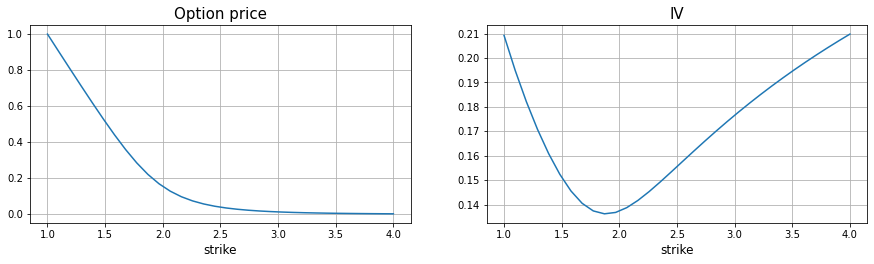

In [8]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [9]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

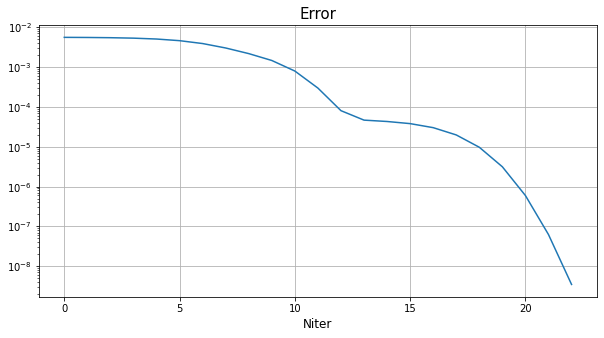

In [10]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [11]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [0.2 0.5 0.4 0.3]
calib params: [0.20000002 0.50000001 0.39999985 0.30000006]


In [12]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [13]:
c1 - c0

array([ 6.82593981e-11,  5.48423529e-11,  2.24524843e-11, -3.84692278e-11,
       -1.37085676e-10, -2.74801737e-10, -4.31175540e-10, -5.50068879e-10,
       -5.51442003e-10, -3.89450694e-10, -1.08421938e-10,  1.85132132e-10,
        4.04133838e-10,  5.20345544e-10,  5.48439683e-10,  5.17614063e-10,
        4.54702942e-10,  3.78853171e-10,  3.01853847e-10,  2.30109182e-10,
        1.66553882e-10,  1.12079304e-10,  6.64616279e-11,  2.89326479e-11,
       -1.48941970e-12, -2.58206165e-11, -4.50189608e-11, -5.99424121e-11,
       -7.13373249e-11, -7.98395378e-11, -8.59843724e-11, -9.02179061e-11])

In [14]:
iv1 - iv0

array([ 1.34285985e-09,  7.11780468e-10,  1.93411093e-10, -2.21748286e-10,
       -5.35434058e-10, -7.42012618e-10, -8.30500335e-10, -7.91451432e-10,
       -6.30455244e-10, -3.80644682e-10, -9.76694281e-11,  1.64402408e-10,
        3.73194864e-10,  5.19420951e-10,  6.07576572e-10,  6.47245146e-10,
        6.48383014e-10,  6.19553686e-10,  5.67586839e-10,  4.97764080e-10,
        4.14127677e-10,  3.19773763e-10,  2.17083018e-10,  1.07901937e-10,
       -6.32424668e-12, -1.24455585e-10, -2.45586107e-10, -3.68988506e-10,
       -4.94075225e-10, -6.20368812e-10, -7.47480022e-10, -8.75087947e-10])

In [15]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.5
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [16]:
#heston model object
heston = Heston(heston_params, r)

In [17]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

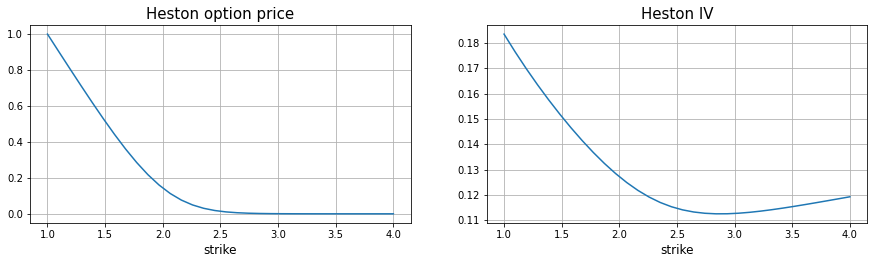

In [18]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

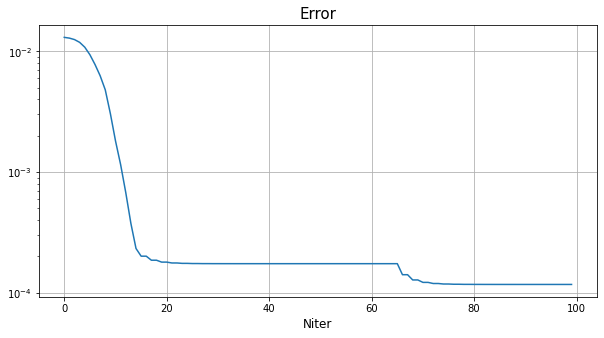

In [19]:
#calibrating sabr to heston
fs = sabr_calib.fit_iv(ivh, Kn, F, T)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [20]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

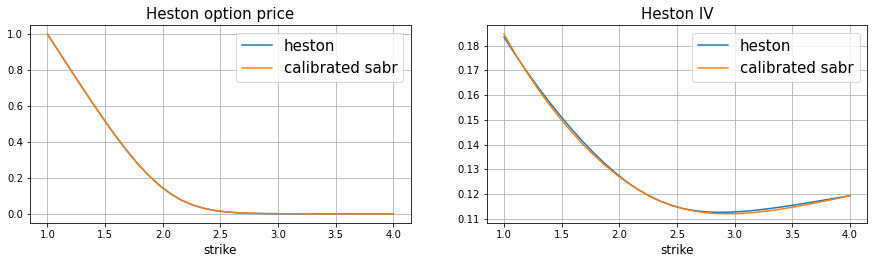

In [21]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [22]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [23]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0754%,
error in iv = 0.5061%
